# 高校数学とJulia言語 Day 3

- 城北中学校・高等学校　中学3年・高校1年
- 夏期講習会III 2025/8/24~2025/8/28
- 担当：清水団

## 本日のテーマ：関数の最大・最小を求めよう！

### 5日間の学習予定
- **Day 1**：Google Colabの紹介・基本計算 ✅
- **Day 2**：関数のグラフの描画 ✅
- **Day 3**：最適化（最大・最小） ← 今日
- **Day 4**：データの分析
- **Day 5**：確率・シミュレーション


## 最大・最小を求める意味

関数の最大値・最小値を求めることは、数学だけでなく実生活でも重要です：

- **経済学**：利益を最大化、費用を最小化
- **工学**：材料を最小限で最大の強度を得る
- **スポーツ**：最高記録を出すための軌道
- **日常生活**：時間や労力を最小にして最大の効果を得る

今日は、グラフを描いて視覚的に最大・最小を見つけ、その後数値的に正確な値を求める方法を学びます。


## 必要なパッケージの準備

グラフの描画に必要なパッケージを読み込みましょう。


In [33]:
# パッケージの読み込み
using Plots

# フォント設定（日本語ラベルのため）
gr(fontfamily="ipam")

println("パッケージの読み込み完了！")

パッケージの読み込み完了！


## 基本的な最大・最小問題

まずは簡単な2次関数から始めてみましょう。

### 問題1：2次関数 $f(x) = -x^2 + 4x + 1$ の最大値を求める


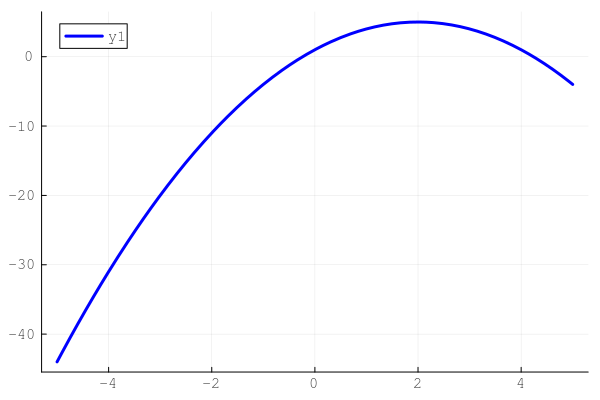

In [34]:
# まず，関数を定義してグラフを書いて，最大値がどのあたりか確認しましょう。

# 関数を定義
f(x) = -x^2 + 4x + 1

# グラフをプロット
plot(f,lw =3,color=:blue)


In [35]:
# 数値的に最大値を探します。
# グラフから x = 2 付近が最大値と予想されるので、その周辺を詳しく調べてみます。
# 調べたら，結果を文章でアウトプットしてみよう。

X = 1.5:0.01:2.5    # x = 1.5 から 2.5 まで 0.01 刻み
Y = f.(X)   # 各x値での関数値を計算

# 最大値とその位置を見つける
@show y = maximum(Y)
@show x = X[argmax(Y)]

# 文章で答えてみよう。
println("x=$x のとき，最大値 y=$y")

y = maximum(Y) = 5.0
x = X[argmax(Y)] = 2.0
x=2.0 のとき，最大値 y=5.0


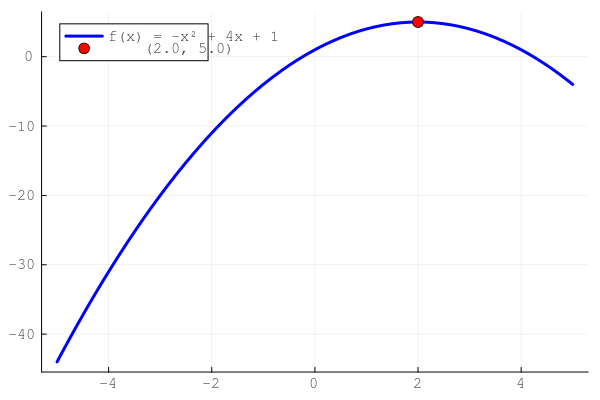

GKS: glyph missing from current font: 26368
GKS: glyph missing from current font: 22823
GKS: glyph missing from current font: 20516
GKS: glyph missing from current font: 26368
GKS: glyph missing from current font: 22823
GKS: glyph missing from current font: 20516


In [36]:
# グラフに最大値の点を追加してみよう

plot(f, lw=3, label="f(x) = -x² + 4x + 1", color=:blue)
scatter!([x], [y], ms=6, color=:red, label="最大値 ($x, $y)")

#### 理論的解法との比較

**平方完成して求めます。**

$$f(x) = -x^2 + 4x + 1 = -(x-2)^2+5$$

$$ \therefore \max f(x) = f(2) = 5 $$

## 区間を制限した最大・最小問題

### 問題2：関数 $g(x) = x^3 - 6x^2 + 9x + 2$ の区間 $[-1, 3]$での最大値・最小値を求める

-  区間 $[-1, 3]$は$-1\leqq x\leqq 3$の範囲となります。
-  3次関数では、極大値・極小値が複数存在することがあります。


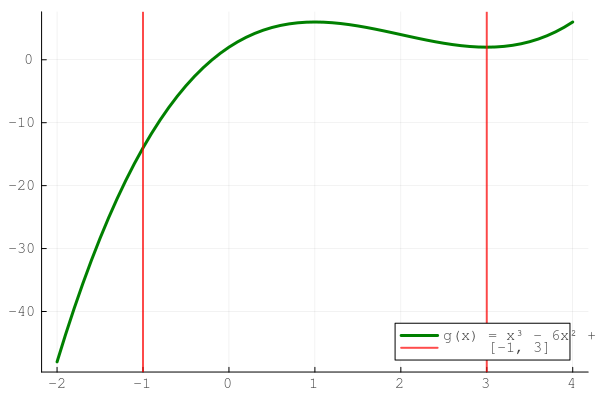

GKS: glyph missing from current font: 21046
GKS: glyph missing from current font: 32004
GKS: glyph missing from current font: 21306
GKS: glyph missing from current font: 38291
GKS: glyph missing from current font: 21046
GKS: glyph missing from current font: 32004
GKS: glyph missing from current font: 21306
GKS: glyph missing from current font: 38291


In [37]:

# 関数を定義
g(x) = x^3 - 6x^2 + 9x + 2

# まず広い範囲でグラフを描いて全体像を把握
plot(g, -2:0.1:4, lw=3, label="g(x) = x³ - 6x² + 9x + 2", color=:green)

# 制約区間 [-1, 3] を示す
vline!([-1, 3], color=:red, lw=2, alpha=0.7, label="制約区間 [-1, 3]")

In [38]:
# 区間 [-1, 3] での数値的探索
X = -1:0.01:3  # 区間 [-1, 3] を 0.01 刻みで探索
Y = g.(X)

# 最大値と最小値を見つける
ymax = maximum(Y)
ymin = minimum(Y)
xposmax = X[argmax(Y)]
xposmin = X[argmin(Y)]

println("=== 区間 [0, 5] での最大・最小 ===")
println("最大値: ", round(ymax, digits=3), " (x = ", round(xposmax, digits=3), ")")
println("最小値: ", round(ymin, digits=3), " (x = ", round(xposmin, digits=3), ")")

=== 区間 [0, 5] での最大・最小 ===
最大値: 6.0 (x = 1.0)
最小値: -14.0 (x = -1.0)


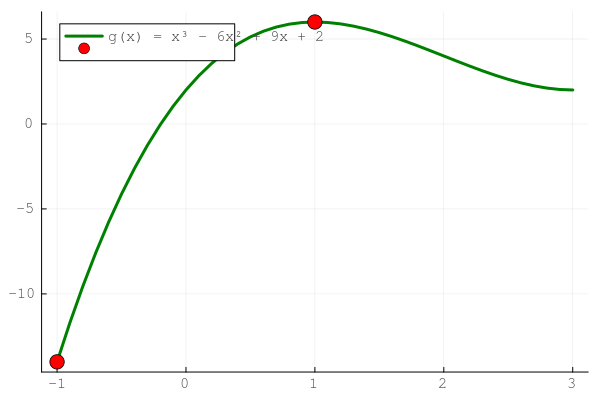

GKS: glyph missing from current font: 26368
GKS: glyph missing from current font: 22823
GKS: glyph missing from current font: 12539
GKS: glyph missing from current font: 26368
GKS: glyph missing from current font: 23567
GKS: invalid bitmap size


In [31]:
# グラフに最大・最小の点を追加してみよう

plot(g, -1:0.1:3, lw=3, label="g(x) = x³ - 6x² + 9x + 2", color=:green)
scatter!([xposmax,xposmin],[ymax,ymin],ms = 8,color=:red,label="最大・最小")

#### 理論的解法との比較

**微分して求めます。**

$$g(x) = x^3 - 6x^2 + 9x + 2$$

$$g'(x) = 3x^2-12x+9 =3(x-3)(x-1)$$

$$g(-1)=-14,g(1)=6,g(3)=2$$

$$ \therefore \max g(x) =  g(1) =6, \min g(x) =  g(-1) = -14 $$

## 三角関数の最大・最小

### 問題3：関数 $h(x) = 2\sin(x) + \cos(2x)$ の区間 $[0, 2\pi]$ での最大値・最小値を求める

三角関数の合成では、複雑な周期的パターンが現れることがあります。


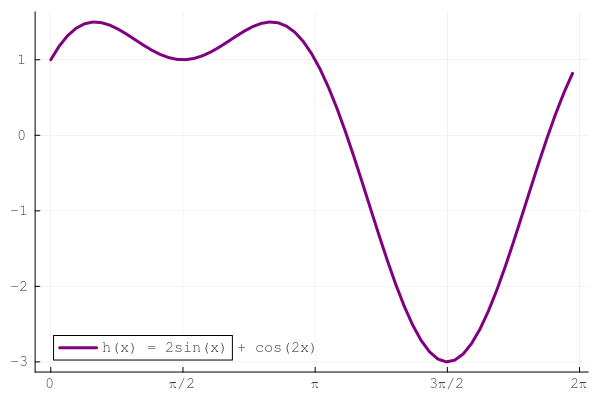

In [39]:
# 関数を定義
h(x) = 2sin(x) + cos(2x)

# グラフを描いて周期的パターンを観察
plot(h, 0:0.1:2π, linewidth=3, label="h(x) = 2sin(x) + cos(2x)", color=:purple)

# x軸の目盛りをπ単位で表示
xticks!([0, π/2, π, 3π/2, 2π], ["0", "π/2", "π", "3π/2", "2π"])

In [40]:
# 区間 [0, 2π] での数値的探索
X = 0:0.001:2π  # より細かく刻んで探索
Y = h.(X)

# 最大値と最小値を見つける
ymax = maximum(Y)
ymin = minimum(Y)
xposmax = X[argmax(Y)]
xposmin = X[argmin(Y)]

println("=== 区間 [0, 2π] での最大・最小 ===")
println("最大値: ", round(ymax, digits=4), " (x ≈ ", round(xposmax, digits=4), ")")
println("最小値: ", round(ymin, digits=4), " (x ≈ ", round(xposmin, digits=4), ")")

# π単位での表示
println("\n=== π単位での表示 ===")
println("最大値の位置: x ≈ ", round(xposmax/π, digits=3), "π")
println("最小値の位置: x ≈ ", round(xposmin/π, digits=3), "π")


=== 区間 [0, 2π] での最大・最小 ===
最大値: 1.5 (x ≈ 2.618)
最小値: -3.0 (x ≈ 4.712)

=== π単位での表示 ===
最大値の位置: x ≈ 0.833π
最小値の位置: x ≈ 1.5π


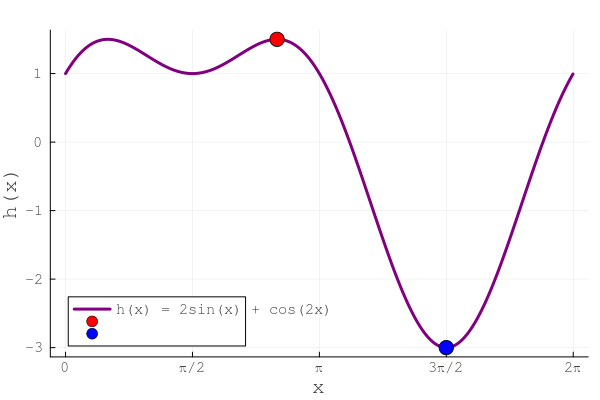

GKS: glyph missing from current font: 19977
GKS: glyph missing from current font: 35282
GKS: glyph missing from current font: 38306
GKS: glyph missing from current font: 25968
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 26368
GKS: glyph missing from current font: 22823
GKS: glyph missing from current font: 12539
GKS: glyph missing from current font: 26368
GKS: glyph missing from current font: 23567
GKS: invalid bitmap size
GKS: glyph missing from current font: 26368
GKS: glyph missing from current font: 22823
GKS: glyph missing from current font: 20516
GKS: invalid bitmap size
GKS: glyph missing from current font: 26368
GKS: glyph missing from current font: 23567
GKS: glyph missing from current font: 20516
GKS: invalid bitmap size


In [41]:

# グラフに最大・最小値をプロット
plot(h, 0:0.01:2π, linewidth=3, label="h(x) = 2sin(x) + cos(2x)", color=:purple)
scatter!([xposmax], [ymax], markersize=8, color=:red, label="最大値")
scatter!([xposmin], [ymin], markersize=8, color=:blue, label="最小値")
title!("三角関数の最大・最小")
xlabel!("x")
ylabel!("h(x)")
xticks!([0, π/2, π, 3π/2, 2π], ["0", "π/2", "π", "3π/2", "2π"])

In [42]:
# 考察 x= 0のときも最大値ではないか？
# [0, π/2] で調べてみる

X = 0:0.001:π/2
Y = h.(X)
@show Y |>maximum 
@show X[argmax(Y)]


Y |> maximum = 1.4999997585844151
X[argmax(Y)] = 0.524


0.524

## 最大・最小を求める方法の比較

今日学んだ数値的手法と理論的手法を比較してみましょう。

### 数値的手法（今日の方法）
**メリット：**
- 複雑な関数でも適用可能
- グラフで視覚的に理解できる
- プログラムで自動化できる
- 制約条件を簡単に扱える

**デメリット：**
- 近似解しか得られない
- 計算時間がかかる場合がある
- 局所的な最大・最小を見落とす可能性

### 理論的手法（微分を使用）
**メリット：**
- 厳密解が得られる
- 計算が高速
- 数学的に美しい

**デメリット：**
- 微分可能な関数に限定
- 複雑な関数では計算が困難
- 制約条件の扱いが複雑


## Day 3 の演習問題

以下の問題に取り組んでみましょう。まずグラフを描いて最大・最小の位置を予想し、その後数値的に正確な値を求めてください。

### 問題1: 2次関数の最小値

関数 $f(x) = 2x^2 - 8x + 11$ の最小値とそのときの $x$ の値を求めてください。

1. まずグラフを描いて、最小値の位置を視覚的に確認
2. 数値的に最小値と最小値を与える $x$ を求め，文章でアウトプット
3. グラフに最小値の位置の点をプロット

### 問題2: 3次関数の制約付き最適化

関数 $g(x) = x^3 - 3x^2 + 2$ の区間 $[-1, 3]$ での最大値と最小値を求めてください。

1. グラフを描いて全体像を把握
2. 区間内での最大値・最小値を数値的に求める
3. グラフに最大値・最小値の位置の点をプロット
4. その他に最大・最小となる点はあるか考察しよう。

### 問題3: 応用問題

関数 $h(x) = \sqrt{x^2+1} + \sqrt{x^2-2x+5}$ の最小値を求めてください。

1. グラフを描いて全体像を把握
2. 区間内での最小値を数値的に求める
3. グラフに最小値の位置の点をプロット
4. 考察（理論的にもとまるかな？）



## 解答欄

以下のセルに解答を記入してください。


### 問題1の解答：2次関数の最小値

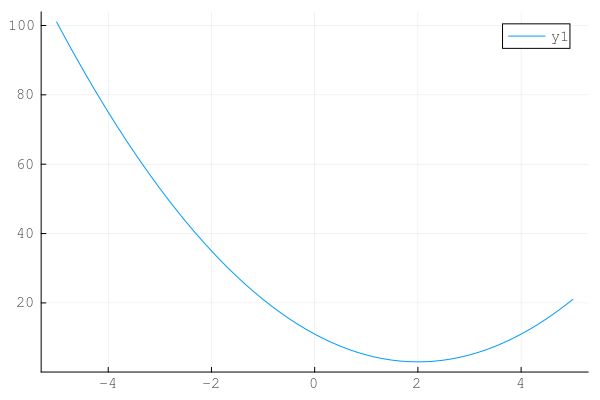

In [46]:
# 問題1: f(x) = 2x² - 8x + 11 の最小値
# 1. まずグラフを描いて、最小値の位置を視覚的に確認

f(x) = 2x^2-8x+11

plot(f)



In [47]:
# 2. 数値的に最小値と最小値を与える $x$ を求め，文章でアウトプット
X = 0:0.001:4
Y = f.(X)
y = minimum(Y)
x = X[argmin(Y)]

println("x=$x のとき，最小値 y=$y")

x=2.0 のとき，最小値 y=3.0


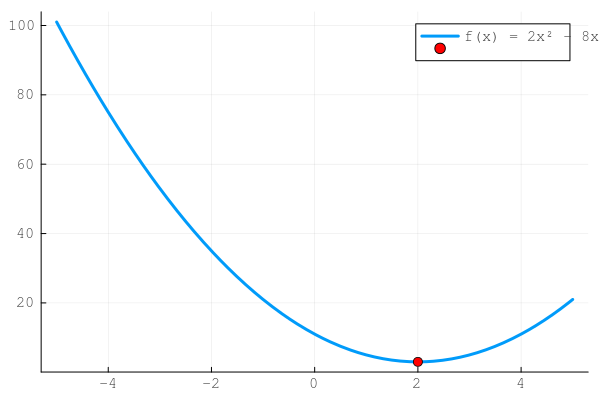

GKS: glyph missing from current font: 26368
GKS: glyph missing from current font: 23567
GKS: glyph missing from current font: 20516
GKS: invalid bitmap size


In [48]:
#3. グラフに最小値の位置の点をプロット

plot(f,lw=3, label="f(x) = 2x² - 8x + 11")
scatter!([x],[y],markersize=5, color=:red, label="最小値")

### 問題2の解答：3次関数の制約付き最適化

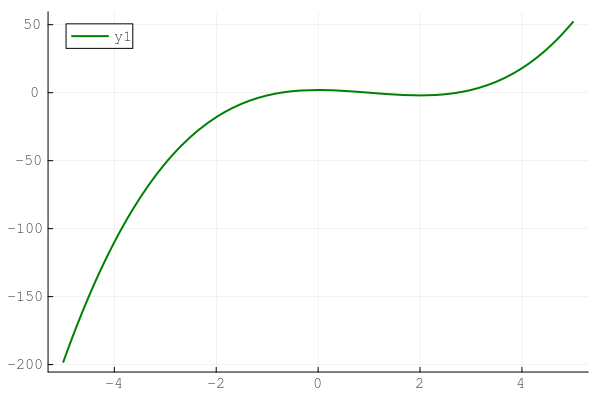

In [51]:
# 問題2: g(x) = x³ - 3x² + 2 の区間 [-1, 3] での最大値・最小値
# 1. グラフを描いて全体像を把握
g(x) = x^3-3x^2+2

plot(g,lw = 2,color=:green)

In [52]:
# 2. 区間内での最大値・最小値を数値的に求める
# 区間 [-1, 3] での数値的探索
X = -1:0.01:3  # 区間 [-1, 3] を 0.01 刻みで探索
Y = g.(X)

# 最大値と最小値を見つける
ymax = maximum(Y)
ymin = minimum(Y)
xposmax = X[argmax(Y)]
xposmin = X[argmin(Y)]

println("=== 区間 [0, 5] での最大・最小 ===")
println("最大値: ", round(ymax, digits=3), " (x = ", round(xposmax, digits=3), ")")
println("最小値: ", round(ymin, digits=3), " (x = ", round(xposmin, digits=3), ")")

=== 区間 [0, 5] での最大・最小 ===
最大値: 2.0 (x = 0.0)
最小値: -2.0 (x = -1.0)


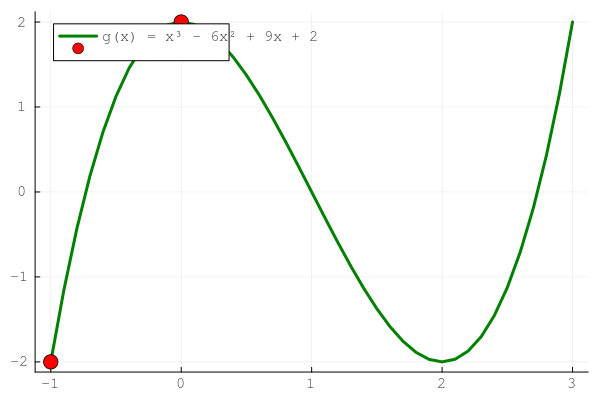

GKS: glyph missing from current font: 26368
GKS: glyph missing from current font: 22823
GKS: glyph missing from current font: 12539
GKS: glyph missing from current font: 26368
GKS: glyph missing from current font: 23567
GKS: invalid bitmap size


In [53]:
# 3. グラフに最大値・最小値の位置の点をプロット

plot(g, -1:0.1:3, lw=3, label="g(x) = x³ - 6x² + 9x + 2", color=:green)
scatter!([xposmax,xposmin],[ymax,ymin],ms = 8,color=:red,label="最大・最小")

In [54]:
# 4. その他に最大・最小となる点はあるか考察しよう。

@show g(2)
@show g(3)

g(2) = -2
g(3) = 2


2

### 問題3の解答：応用問題

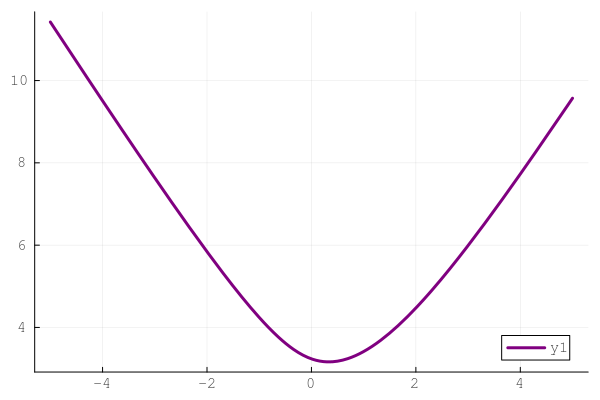

In [55]:
# 問題3:  √(x^2+1) + √(x^2-2x+5) の最小値
# 1. グラフを描いて全体像を把握

h(x) = √(x^2+1) + √(x^2-2x+5)

plot(h,lw = 3,color=:purple)

In [56]:
# 2. 区間内での最小値を数値的に求める
X = 0:0.001:2
Y = h.(X)

@show y = Y |> minimum
@show x = X[Y |> argmin]

y = Y |> minimum = 3.162277731323184
x = X[Y |> argmin] = 0.333


0.333

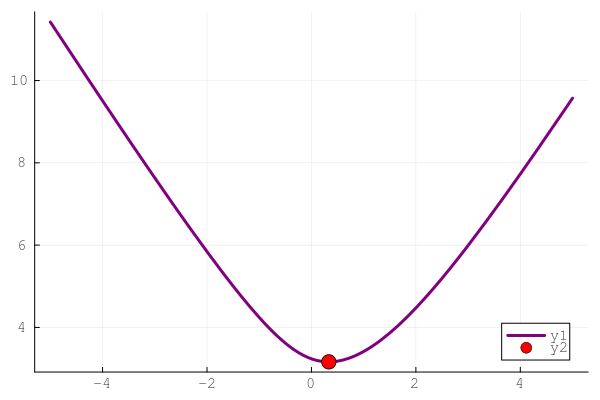

In [57]:
# 3. グラフに最小値の位置の点をプロット

plot(h,lw = 3,color=:purple)
scatter!([x],[y],ms=8,color=:red)

In [58]:
# 4. 考察（理論的にもとまるかな？）

h(1/3)

3.1622776601683795

## まとめ

今日は関数の最大・最小を求める方法を学びました。

### 学習した内容

#### 数値的最適化の手順
1. **グラフの描画**：関数の全体像を把握
2. **視覚的予想**：最大・最小の位置を大まかに特定
3. **詳細探索**：予想した範囲を細かく刻んで数値計算
4. **結果の検証**：理論値や他の方法と比較

#### 扱った関数の種類
- **2次関数**：頂点での最大・最小
- **3次関数**：極値と制約条件
- **三角関数**：周期的な最大・最小

#### 重要なポイント
- グラフを描くことで問題の理解が深まる
- 数値的手法は複雑な問題にも適用可能
- 制約条件（定義域）を常に意識する
- 端点での値も忘れずに確認する

### 次回予告

Day 4では、データの分析について学習します。実際のデータを使って平均・分散・相関などの統計量を計算し、データの特徴を読み取る方法を学びましょう！

### 提出について

このノートブックに解答を記入し、保存してからGoogle Classroomに提出してください。

### 参考資料

- Julia Plots.jl Documentation: https://docs.juliaplots.org/
